In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

# Load the dataset
file_path = 'D:/aip/dataset_withseparatedmovesandtime.csv'
data = pd.read_csv(file_path)

# Combine all moves from both players into a single feature, including player names
data['AllMoves'] = data.apply(lambda row: f"{row['White']} {row['WhiteMoves']} {row['Black']} {row['BlackMoves']}", axis=1)

# Prepare the target: Predict the first move of White
y = data['WhiteMoves'].apply(eval).apply(lambda x: x[0] if len(x) > 0 else 'UNKNOWN')

# Label Encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['AllMoves'], y_encoded, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Transforming the text data into numerical format using CountVectorizer
vectorizer = CountVectorizer(tokenizer=lambda x: x.split())
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Train the model
rf_model.fit(X_train_vect, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test_vect)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

# Optional: Cross-validation for more robust accuracy
cross_val_scores = cross_val_score(rf_model, X_train_vect, y_train, cv=5)
print(f"Cross-Validation Accuracy: {cross_val_scores.mean()}")


c:\Users\shaik\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Model Accuracy: 0.9666571265025758


c:\Users\shaik\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy: 0.9632902862158004


c:\Users\shaik\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


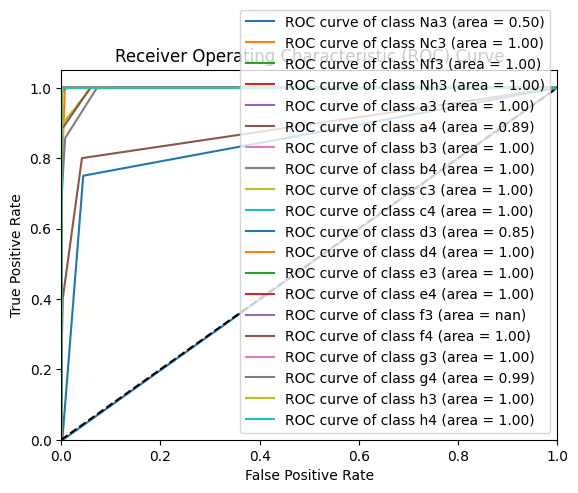

In [6]:
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
y_score = rf_model.predict_proba(X_test_vect)

# Compute ROC curve and ROC area for each class
n_classes = len(label_encoder.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                     ''.format(label_encoder.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()